# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow

# Import Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class:  Ankle boot


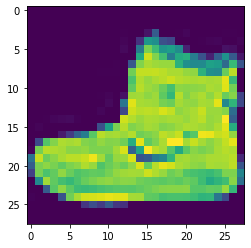

class:  T-shirt/top


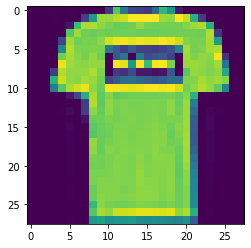

class:  T-shirt/top


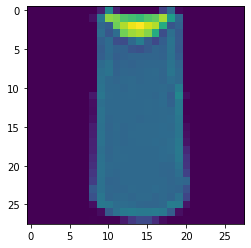

class:  Dress


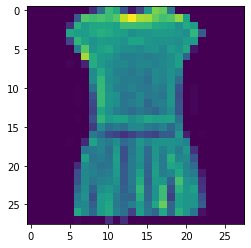

class:  T-shirt/top


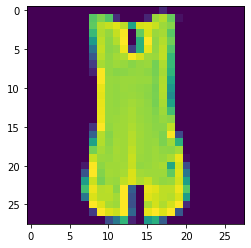

class:  Pullover


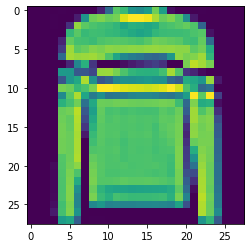

class:  Sneaker


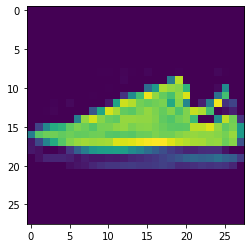

class:  Pullover


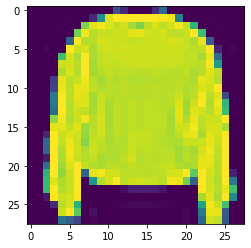

class:  Sandal


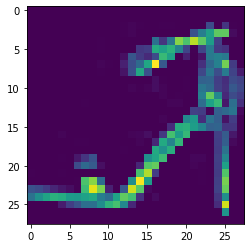

class:  Sandal


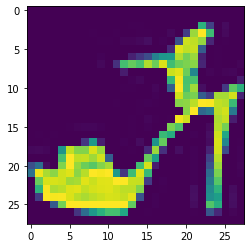

In [6]:
for i in range(10):
    print('class: ',class_names[int(y_train[i])])
    plt.imshow(X_train[i])
    plt.show()

# Preprocessing

In [7]:
X_train.min(),X_train.max()

(0, 255)

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
X_train.min(),X_train.max()

(0.0, 1.0)

# One hot encode

In [11]:
int(pd.DataFrame(y_train).nunique())

10

In [12]:
y_train_encoded = to_categorical(y_train, num_classes= 10)

In [13]:
y_test_encoded = to_categorical(y_test, num_classes= 10)

In [14]:
# Add color channel 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), 
                    filters = 32, 
                    kernel_size = (4,4),
                    kernel_initializer = 'he_normal',
                    activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))
             
model.add(Conv2D(filters = 64, 
                    kernel_size = (4,4),
                    kernel_initializer = 'he_normal',
                    activation = 'relu'))
           
model.add(MaxPool2D(pool_size = (2,2)))
             
             
model.add(Flatten())

model.add(Dense(units = 256,
                   activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 128,
                   activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 10,
                   activation = 'softmax'))             

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [18]:
model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

In [19]:
early = EarlyStopping(monitor = 'val_loss', patience = 2)

In [20]:
model.fit(X_train,
             y_train_encoded,
             epochs = 300,
             validation_split = 0.1,
             callbacks= [early])

Epoch 1/300
1688/1688 [==============================] - 28s 16ms/step - loss: 0.6576 - accuracy: 0.7634 - val_loss: 0.3860 - val_accuracy: 0.8597
Epoch 2/300
1688/1688 [==============================] - 24s 14ms/step - loss: 0.4166 - accuracy: 0.8506 - val_loss: 0.3336 - val_accuracy: 0.8762
Epoch 3/300
1688/1688 [==============================] - 24s 14ms/step - loss: 0.3540 - accuracy: 0.8728 - val_loss: 0.3172 - val_accuracy: 0.8892
Epoch 4/300
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3189 - accuracy: 0.8853 - val_loss: 0.3117 - val_accuracy: 0.8863
Epoch 5/300
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2964 - accuracy: 0.8942 - val_loss: 0.2990 - val_accuracy: 0.8940
Epoch 6/300
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2740 - accuracy: 0.9013 - val_loss: 0.2935 - val_accuracy: 0.8955
Epoch 7/300
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2579 - accuracy: 0.9065 - val_loss: 0

In [21]:
metrics = pd.DataFrame(model.history.history)

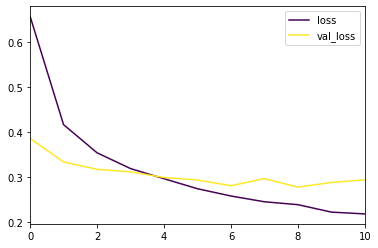

In [22]:
metrics[['loss','val_loss']].plot(colormap = 'viridis');

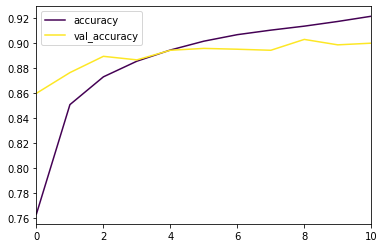

In [23]:
metrics[['accuracy','val_accuracy']].plot(colormap = 'viridis');

In [24]:
model.evaluate(X_test,y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.3050 - accuracy: 0.8963


[0.30504435300827026, 0.8963000178337097]

In [25]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.78      0.83      1000
           3       0.90      0.91      0.90      1000
           4       0.79      0.87      0.83      1000
           5       0.96      0.99      0.97      1000
           6       0.69      0.71      0.70      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



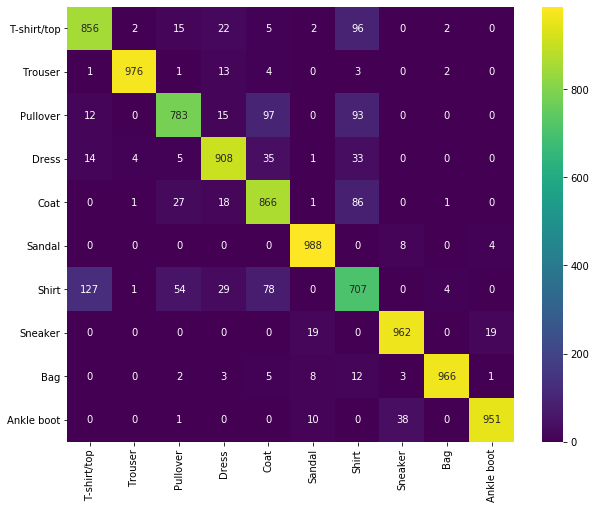

In [27]:
plt.figure(figsize= (10,8))
sns.heatmap(confusion_matrix(y_test, predictions),xticklabels = class_names,yticklabels = class_names, annot=True, cmap = 'viridis', fmt='d');